# Exercise: SciPy 

Read in ds0.csv

```python
import pandas as pd
pd.read_csv('data/ds0.csv')
```

In [4]:
import pandas as pd
dat = pd.read_csv('data/ds0.csv')

Scatter-plot the xs and ys columns from ds0

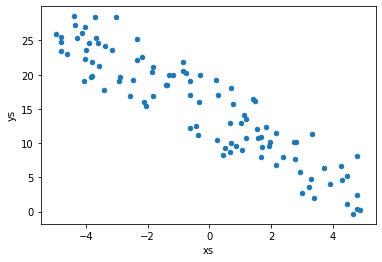

In [6]:
dat.plot.scatter('xs', 'ys')

Use scipy to find the best fit line for the given xs and ys

In [10]:
from scipy import optimize

def fun(x, p):
    m, b = p
    return m * x + b

def residuals(p, y, x):
    return y - fun(x, p)

p0 = [0,0]

plsq = optimize.leastsq(residuals, p0, args=(dat['ys'], dat['xs']))
plsq

(array([-2.41891949, 14.57185576]), 3)

Plot the original data along with a line showing your fitted slope/intercept line

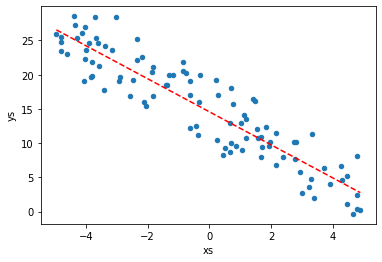

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes()
dat.plot.scatter('xs', 'ys', ax=ax)
xpred = np.r_[dat['xs'].min():dat['xs'].max():10j]
m, b = plsq[0]
ax.plot(xpred, m * xpred + b, 'r--');

Read in data/ds1.csv

In [19]:
dat = pd.read_csv('data/ds1.csv')
dat.head()

,Unnamed: 0,xs,ys
0,0,-1.000000,0.655973
1,1,-0.948718,0.625703
2,2,-0.897436,2.052326
3,3,-0.846154,0.769773
4,4,-0.794872,3.473695


Scatter-plot xs and ys in ds1

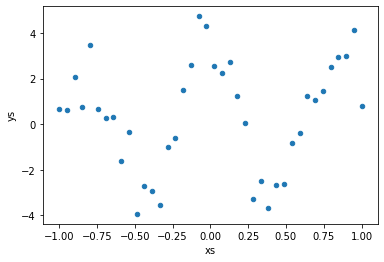

In [21]:
dat.plot.scatter('xs', 'ys');

Use the following transform to get the power distribution of frequencies in the ys:

In [22]:
from scipy import fftpack

freq_power = np.abs(fftpack.fft(dat['ys']))[:len(dat['ys'])//2]

Plot the freq_power and estimate how many frequency components are in the ys

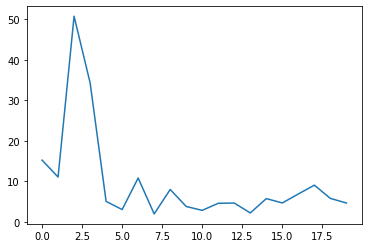

In [23]:
plt.plot(freq_power)

Estimate the amplitude, freqency, and phase of each component using optimize.leastsq:

In [24]:
def peval(x, p):
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)
    
def residuals(p, y, x):
    return y - peval(x, p)

p_initial = [1,1,1]

In [25]:
plsq = optimize.leastsq(residuals, p_initial, args=(dat['ys'], dat['xs']))
plsq

(array([3.03837032, 1.18834444, 1.61900246]), 1)

Plot  `A * np.sin(2 * np.pi * k * x + theta)` with the discovered A, k, and theta along with the xs and ys

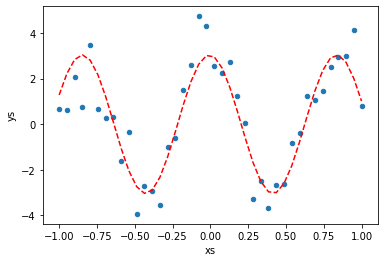

In [28]:
ax = plt.axes()
A, k, theta = plsq[0]
dat.plot.scatter('xs', 'ys', ax=ax)
x = dat['xs']
ax.plot(x, A * np.sin(2 * np.pi * k * x + theta), '--r')